# 使用梯度上升法实现PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100) # uniform是均匀分布
X[:,1] = 3. + 0.75 * X[:,0] + np.random.normal(0.,10.,size=100) # normal 正态分布

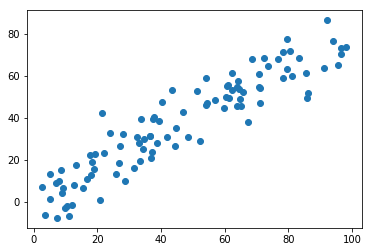

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## demean

In [7]:
def demean(X):
    return X - np.mean(X,axis=0)

In [16]:
np.mean(X,axis=0)

array([46.56273218, 37.63818301])

In [11]:
X

array([[65.78091789, 52.46264731],
       [44.56904185, 35.05915611],
       [60.31499528, 49.8719047 ],
       [31.3998559 , 16.02609168],
       [ 9.80813933, -3.03714111],
       [96.38871831, 70.58595955],
       [28.18387127, 32.50416871],
       [95.63433708, 65.22161797],
       [28.81989529,  9.93405535],
       [21.9549943 , 23.49162497],
       [ 3.65918102, -6.18649839],
       [51.15356529, 52.64070479],
       [34.76271724, 30.00774453],
       [61.14223425, 55.87269571],
       [38.71981481, 27.83124001],
       [41.79563962, 31.07443915],
       [56.92753904, 48.64745757],
       [92.12184042, 86.46679325],
       [12.56802799,  7.96885971],
       [73.64472305, 64.59162256],
       [72.39286127, 68.38962305],
       [23.89288879, 32.99229022],
       [33.25257813, 19.58381265],
       [60.80312172, 55.23905777],
       [18.90861464, 15.84741545],
       [80.65231264, 71.64121015],
       [44.50527676, 26.37860735],
       [ 8.48522972, 15.08496439],
       [ 5.12082818,

In [12]:
X_demean = demean(X)
X_demean

array([[ 19.2181857 ,  14.82446431],
       [ -1.99369034,  -2.5790269 ],
       [ 13.7522631 ,  12.23372169],
       [-15.16287629, -21.61209133],
       [-36.75459285, -40.67532412],
       [ 49.82598613,  32.94777654],
       [-18.37886092,  -5.1340143 ],
       [ 49.0716049 ,  27.58343496],
       [-17.7428369 , -27.70412766],
       [-24.60773789, -14.14655804],
       [-42.90355116, -43.82468139],
       [  4.59083311,  15.00252178],
       [-11.80001494,  -7.63043847],
       [ 14.57950206,  18.2345127 ],
       [ -7.84291738,  -9.806943  ],
       [ -4.76709257,  -6.56374386],
       [ 10.36480686,  11.00927457],
       [ 45.55910824,  48.82861024],
       [-33.9947042 , -29.6693233 ],
       [ 27.08199087,  26.95343955],
       [ 25.83012908,  30.75144004],
       [-22.66984339,  -4.64589279],
       [-13.31015406, -18.05437036],
       [ 14.24038953,  17.60087477],
       [-27.65411754, -21.79076756],
       [ 34.08958045,  34.00302715],
       [ -2.05745542, -11.25957566],
 

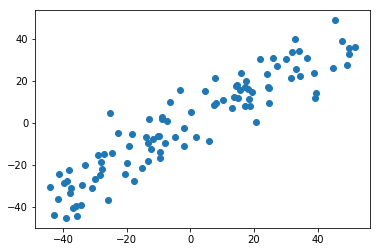

In [15]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [19]:
np.mean(X_demean[:,0])

-1.1297629498585594e-14

In [20]:
np.mean(X_demean[:,1])

1.2683187833317788e-14

## 梯度上升法


In [21]:
def f(w, X):
    return np.sum (X.dot(w) ** 2) / len(X)

In [24]:
def df_math(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [26]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 =w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X))/ 2 * epsilon
    return res


In [28]:
def direction(w):
    return w/np.linalg.norm(w)

In [45]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [41]:
initial_w = np.random.random(X.shape[1])  # 注意2：不能用0向量开始
initial_w

array([0.79429734, 0.09562457])

In [42]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [43]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76511841, 0.6438896 ])

In [47]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

In [48]:
[0, w[0]*30]

[0, 22.95355227982337]

In [49]:
w

array([0.76511841, 0.6438896 ])

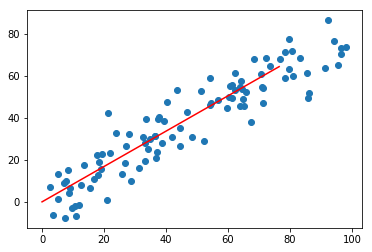

In [53]:
plt.scatter(X[:,0],X[:,1])
plt.plot([0,w[0] * 100],[0,w[1] * 100],color='r') # 方括号里面的意思是 100 * w 这个向量
plt.show()

## 使用极端数据集测试


In [58]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(1.,100.,size=100)
X2[:,1] = X2[:,0] * 0.75 + 3

In [59]:
X2

array([[44.0758015 , 36.05685113],
       [19.84552295, 17.88414221],
       [71.29150044, 56.46862533],
       [52.76645018, 42.57483764],
       [12.77645327, 12.58233995],
       [76.1758644 , 60.1318983 ],
       [75.71419064, 59.78564298],
       [ 8.12136878,  9.09102659],
       [34.89919196, 29.17439397],
       [19.36235991, 17.52176993],
       [96.13423507, 75.10067631],
       [10.92128085, 11.19096064],
       [33.35045432, 28.01284074],
       [45.29245486, 36.96934114],
       [62.76287754, 50.07215816],
       [34.91759519, 29.1881964 ],
       [84.14745907, 66.1105943 ],
       [ 5.25534939,  6.94151204],
       [88.85164476, 69.63873357],
       [31.65963148, 26.74472361],
       [62.35255744, 49.76441808],
       [51.47727922, 41.60795941],
       [63.54247575, 50.65685681],
       [13.32269944, 12.99202458],
       [60.48154375, 48.36115781],
       [28.69711489, 24.52283617],
       [64.29633994, 51.22225495],
       [65.36529131, 52.02396848],
       [78.99519735,

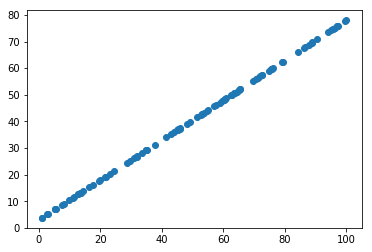

In [60]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [61]:
X2_demean = demean(X2)

In [65]:
w = gradient_ascent(df_math,X2_demean,initial_w,eta)

In [66]:
w

array([0.80000029, 0.59999962])

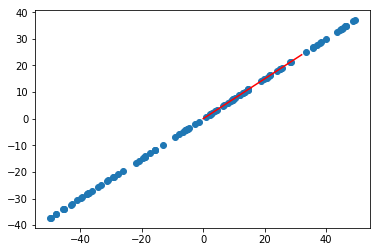

In [71]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w[0]*40],[0,w[1]*40],color='r')
plt.show()